<a href="https://colab.research.google.com/github/kanjamwingirwa/Housing-Prediction/blob/main/Farnadis_Kanja_Housing_Prediction_IP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# **Defining the Metric for Sucess**

A model of at least 80% accuracy

# **Understanding the Context**

The real estate industry is one which fluctuates a lot. Prices of houses are influenced by various factors including size, location, number of bedrooms and bathrooms, the view etc. 

# **Recording the Experimental Design**
1. Data cleaning and preparation

2. Exploratory Data Analysis

3. Regression Models; Multiple Regression, Quantile,Ridge, Lasso, Elastic Net

4. Conclusions

# **Data Preparation and Cleaning**

In [ ]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#load and preview the data set
house_data = pd.read_csv('house_data.csv')
house_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#load and preview the data set
house_data = pd.read_csv('house_data.csv')
house_data.tail
(5)

5

In [ ]:
#look at the shape of the data to know the number of rows and columns
house_data.shape

(21613, 20)

In [ ]:
#check out the info of the data sets
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#check for any null values in the data set
house_data.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in our data set showing that it is clean enough to work with 

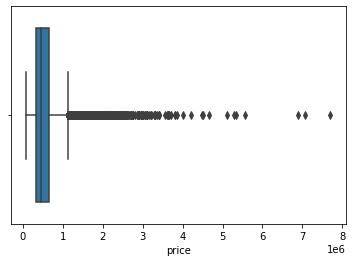

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='price')

While there are outliers, I decided not to drop sincen I feel it is important to keeo them in order to investigate them further.

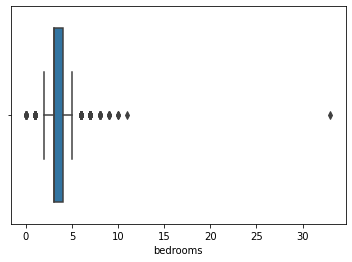

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='bedrooms')

  The outliers in the bedrooms should also be investigated and thus will not be deleted

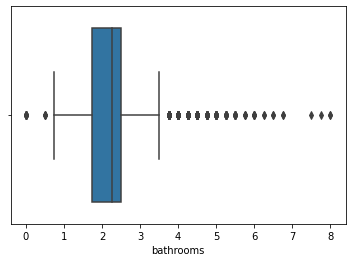

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='bathrooms')

 The outliers in the bathrooms should also be investigated and thus will not be deleted

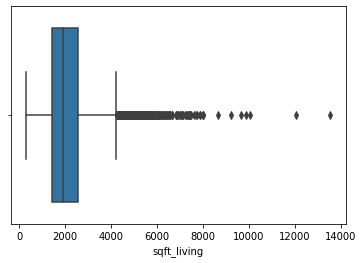

In [ ]:
 #Let's check for outliers
sns.boxplot(data=house_data, x='sqft_living')

The outliers in the bathrooms should also be investigated and thus will not be deleted

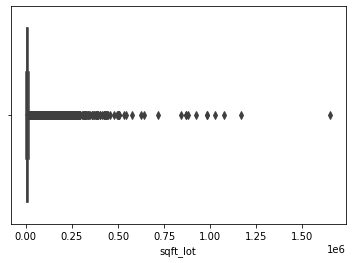

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='sqft_lot')

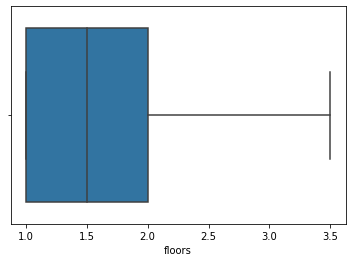

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='floors')

No outliers for this particular variable 

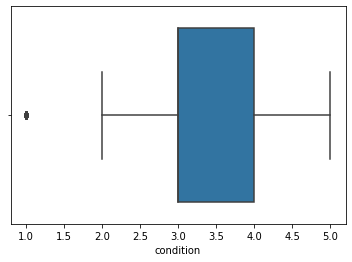

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='condition')

It would be nice to know how the house with condition '1' performs in the market and hence we shall not delete it. 

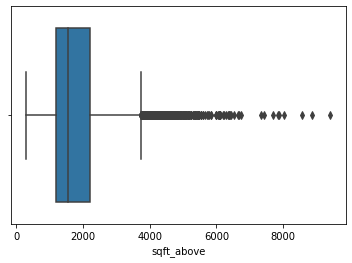

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='sqft_above')

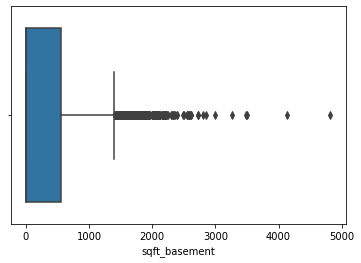

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='sqft_basement')

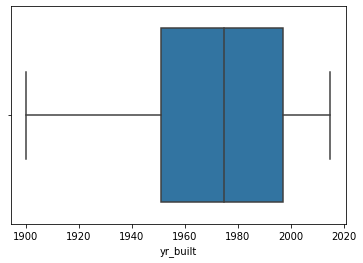

In [ ]:
sns.boxplot(data=house_data, x='yr_built') 

Most of the houses were built between 1950 and 2000 and no outliers were detected. 

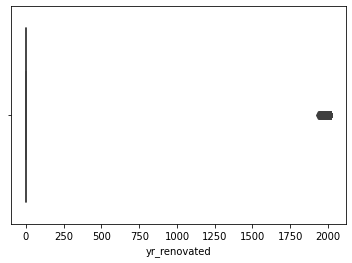

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='yr_renovated')

There seems to be very little data on the year renovated and thus we shall delete this particular variable 

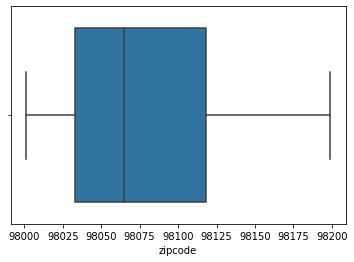

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='zipcode')

Upon some investigation, this zipcodes were pinpointed to Washington area in the United States. Thus, this variable was deleted. 

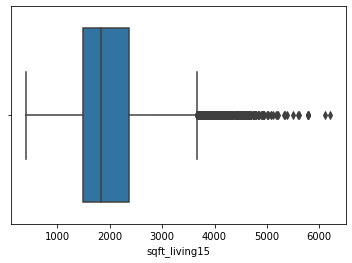

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='sqft_living15') 

There are outliers but they will not be deleted to see if there is correlation btn the extremeties. 

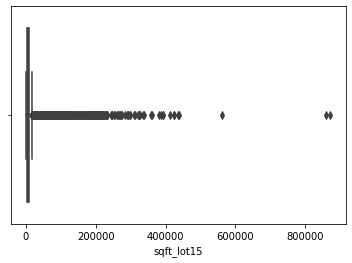

In [ ]:
#Let's check for outliers
sns.boxplot(data=house_data, x='sqft_lot15')

The outliers will not be deleted since the data is not normally distributed. 

In [ ]:
#delete some columns that I feel are not relevant
house_data= house_data.drop(['yr_renovated', 'lat', 'long'], axis=1)
house_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [ ]:
#Remove the decimal point in floors as one can't say 1.3 floors
house_data['floors']=house_data['floors'].astype(int)
house_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,98178,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,98125,1690,7639
2,5631500400,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,98028,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,98136,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,98074,1800,7503


In [ ]:
#delete id column under the assumption that each id is uique
house_data= house_data.drop(['id'], axis=1)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,98028,2720,8062
3,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,98074,1800,7503


# **Exploratory Data Analysis**

**Univariate Data Analysis**

In [ ]:
#Find out the data types in the data frames
house_data.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#convert the bedroom variable into integers
house_data['bathrooms']=house_data['bathrooms'].astype(int)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0.0,0.0,3,7,1180,0,1955,98178,1340,5650
1,538000,3,2,2570,7242,2,0.0,0.0,3,7,2170,400,1951,98125,1690,7639
2,180000,2,1,770,10000,1,0.0,0.0,3,6,770,0,1933,98028,2720,8062
3,604000,4,3,1960,5000,1,0.0,0.0,5,7,1050,910,1965,98136,1360,5000
4,510000,3,2,1680,8080,1,0.0,0.0,3,8,1680,0,1987,98074,1800,7503


In [ ]:
house_data['waterfront']=house_data['waterfront'].astype(float)
-house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1,0.0,0,3,7,1180,0,1955,98178,1340,5650
1,538000,3,2.25,2570,7242,2,0.0,0,3,7,2170,400,1951,98125,1690,7639
2,180000,2,1.00,770,10000,1,0.0,0,3,6,770,0,1933,98028,2720,8062
3,604000,4,3.00,1960,5000,1,0.0,0,5,7,1050,910,1965,98136,1360,5000
4,510000,3,2.00,1680,8080,1,0.0,0,3,8,1680,0,1987,98074,1800,7503


In [ ]:
house_data['view']=house_data['view'].astype(float)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1,0.0,0.0,3,7,1180,0,1955,98178,1340,5650
1,538000,3,2.25,2570,7242,2,0.0,0.0,3,7,2170,400,1951,98125,1690,7639
2,180000,2,1.00,770,10000,1,0.0,0.0,3,6,770,0,1933,98028,2720,8062
3,604000,4,3.00,1960,5000,1,0.0,0.0,5,7,1050,910,1965,98136,1360,5000
4,510000,3,2.00,1680,8080,1,0.0,0.0,3,8,1680,0,1987,98074,1800,7503


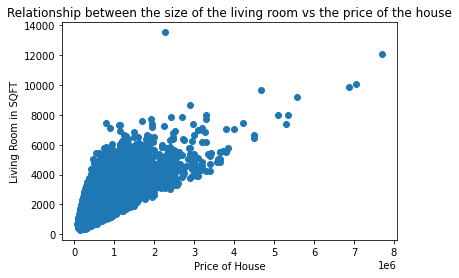

In [ ]:
plt.scatter(house_data['price'],house_data['sqft_living'])
#label the axes
plt.xlabel('Price of House')
plt.ylabel('Living Room in SQFT')
plt.title('Relationship between the size of the living room vs the price of the house')
plt.show()

There seems to be an almost linear relationship between the size of the living room and the price of the house. This means that the more the space of the living room, the more expensive the house.  

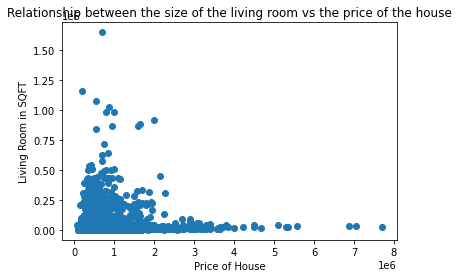

In [ ]:
plt.scatter(house_data['price'],house_data['sqft_lot'])
#label the axes
plt.xlabel('Price of House')
plt.ylabel('Lot in SQFT')
plt.title('Relationship between the size of the lot vs the price of the house')
plt.show()

NO sort of relationship detected here. 

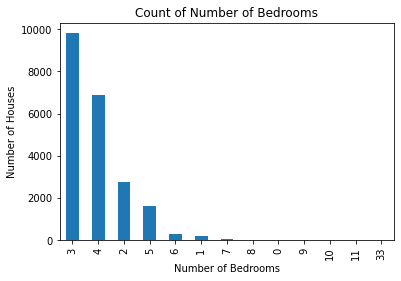

In [ ]:
house_data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.title('Count of Number of Bedrooms')
plt.show()

It seems that the most popular bedrooms were the three bedroom ones. 

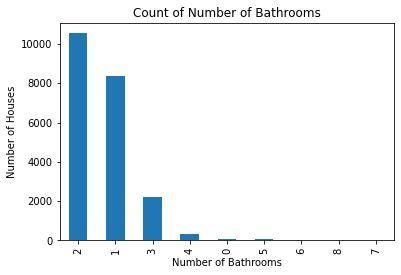

In [ ]:
house_data['bathrooms'].value_counts().plot(kind='bar')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.title('Count of Number of Bathrooms')
plt.show()

The most popular houses had two bedrooms. It's interesting to note that there were houses without bathrooms. What kind of houses were these? Perhaps non residential?


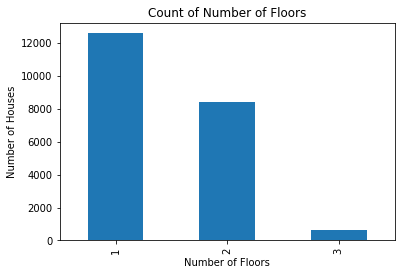

In [ ]:
house_data['floors'].value_counts().plot(kind='bar')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses')
plt.title('Count of Number of Floors')
plt.show()

The majority of houses in thus area were one floor. 

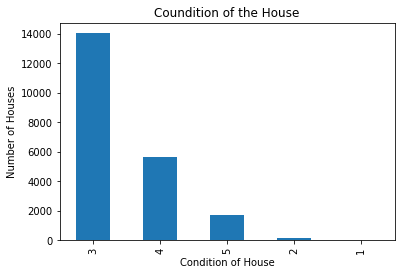

In [ ]:
house_data['condition'].value_counts().plot(kind='bar')
plt.xlabel('Condition of House')
plt.ylabel('Number of Houses')
plt.title('Coundition of the House')
plt.show()

Most houses were not in a poor condition

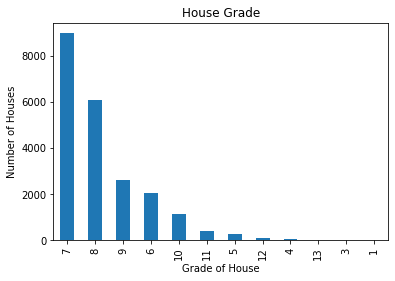

In [ ]:
house_data['grade'].value_counts().plot(kind='bar')
plt.xlabel('Grade of House')
plt.ylabel('Number of Houses')
plt.title('House Grade')
plt.show()

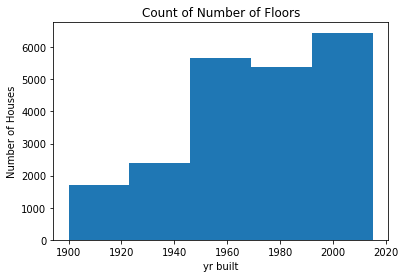

In [ ]:
house_data['yr_built'].plot(kind='hist', bins=5)
plt.xlabel('yr built')
plt.ylabel('Number of Houses')
plt.title('Count of Number of Floors')
plt.show()

Most houses were built in the 90s to the 2010s

In [ ]:
#Measures of Central Tendency(Mean)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].mean().round()

bedrooms              3.0
bathrooms             2.0
price            540182.0
floors                1.0
sqft_living        2080.0
sqft_lot          15107.0
sqft_above         1788.0
sqft_basement       292.0
sqft_living15      1987.0
sqft_lot15        12768.0
dtype: float64

In [ ]:
#Measures of Central Tendency(Mode)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].mode().round()

,bedrooms,bathrooms,price,floors,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3.0,2.0,350000,1.0,1300.0,5000.0,1300.0,0.0,1540.0,5000.0
1,NaN,NaN,450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Measures of Central Tendency(Median)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].median().round()

bedrooms              3.0
bathrooms             2.0
price            450000.0
floors                1.0
sqft_living        1910.0
sqft_lot           7618.0
sqft_above         1560.0
sqft_basement         0.0
sqft_living15      1840.0
sqft_lot15         7620.0
dtype: float64

In [ ]:
#Measures of dispersion(Standard Deviation)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].std()

bedrooms              0.930062
bathrooms             0.734873
price            367362.231718
floors                0.551894
sqft_living         918.440897
sqft_lot          41420.511515
sqft_above          828.090978
sqft_basement       442.575043
sqft_living15       685.391304
sqft_lot15        27304.179631
dtype: float64

In [ ]:
#Measures of dispersion(Variance)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].var()

bedrooms         8.650150e-01
bathrooms        5.400384e-01
price            1.349550e+11
floors           3.045865e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

In [ ]:
#Measures of dispersion(Quantile)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].quantile([0.25,0.5,0.75])

,bedrooms,bathrooms,price,floors,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0.25,3.0,1.0,321950.0,1.0,1427.0,5040.0,1190.0,0.0,1490.0,5100.0
0.50,3.0,2.0,450000.0,1.0,1910.0,7618.0,1560.0,0.0,1840.0,7620.0
0.75,4.0,2.0,645000.0,2.0,2550.0,10688.0,2210.0,560.0,2360.0,10083.0


In [ ]:
#Measures of dispersion(Standard Deviation)
house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].kurt()

bedrooms          49.063653
bathrooms          1.989574
price             34.522444
floors            -0.551411
sqft_living        5.243093
sqft_lot         285.077820
sqft_above         3.402304
sqft_basement      2.715574
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

All except floors have a positive curtosis.

**Bivariate Data Analysis**

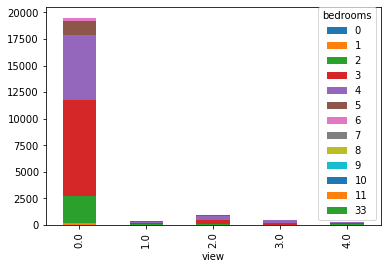

In [ ]:
pd.crosstab(house_data['view'],house_data['bedrooms']).plot(kind='bar',stacked=True)

The  most sold houses had no view and had 3 bedrooms 

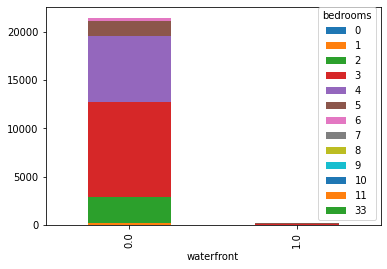

In [ ]:
pd.crosstab(house_data['waterfront'],house_data['bedrooms']).plot(kind='bar',stacked=True)

The most popular houses had no waterfront and had three bedrooms

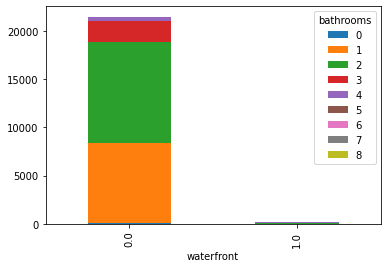

In [ ]:
pd.crosstab(house_data['waterfront'],house_data['bathrooms']).plot(kind='bar',stacked=True)

The most popular houses had no waterfront and had 2 bathrooms

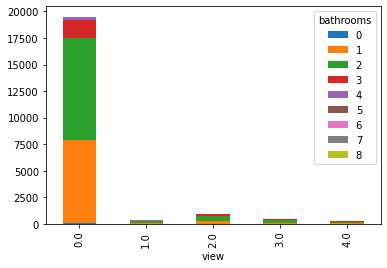

In [ ]:
pd.crosstab(house_data['view'],house_data['bathrooms']).plot(kind='bar',stacked=True)

two bathrooms without a view were the most popular houses

# **Modelling**

In [ ]:
#checking for multicollinearity
corr= house_data[['bedrooms', 'bathrooms', 'price', 'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].corr()
corr

,bedrooms,bathrooms,price,floors,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.000000,0.467452,0.308338,0.155643,0.576671,0.031703,0.477600,0.303093,0.391638,0.029244
bathrooms,0.467452,1.000000,0.510082,0.484822,0.697875,0.085310,0.639933,0.250880,0.510049,0.080779
price,0.308338,0.510082,1.000000,0.237207,0.702044,0.089655,0.605566,0.323837,0.585374,0.082456
floors,0.155643,0.484822,0.237207,1.000000,0.353321,-0.008951,0.517913,-0.235836,0.296561,-0.013252
sqft_living,0.576671,0.697875,0.702044,0.353321,1.000000,0.172826,0.876597,0.435043,0.756420,0.183286
sqft_lot,0.031703,0.085310,0.089655,-0.008951,0.172826,1.000000,0.183512,0.015286,0.144608,0.718557
sqft_above,0.477600,0.639933,0.605566,0.517913,0.876597,0.183512,1.000000,-0.051943,0.731870,0.194050
sqft_basement,0.303093,0.250880,0.323837,-0.235836,0.435043,0.015286,-0.051943,1.000000,0.200355,0.017276
sqft_living15,0.391638,0.510049,0.585374,0.296561,0.756420,0.144608,0.731870,0.200355,1.000000,0.183192
sqft_lot15,0.029244,0.080779,0.082456,-0.013252,0.183286,0.718557,0.194050,0.017276,0.183192,1.000000


There seems to be positive correlation btn many of these variables except for a few such as the square feet and the number of floors. This could be for instance because the basement is not counted as a floor. 

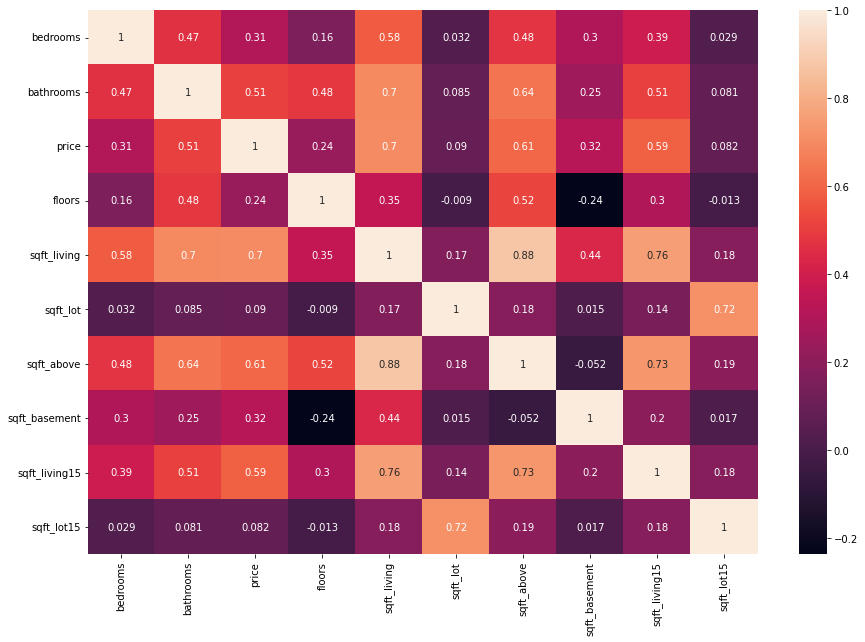

In [ ]:
#use a heatmap to viasualize the above correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

There is a particularly high correlation between square ft living and square ft above

In [ ]:
9#drop square ft above
house_data= house_data.drop(['sqft_above'], axis=1)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0.0,0.0,3,7,0,1955,98178,1340,5650
1,538000,3,2,2570,7242,2,0.0,0.0,3,7,400,1951,98125,1690,7639
2,180000,2,1,770,10000,1,0.0,0.0,3,6,0,1933,98028,2720,8062
3,604000,4,3,1960,5000,1,0.0,0.0,5,7,910,1965,98136,1360,5000
4,510000,3,2,1680,8080,1,0.0,0.0,3,8,0,1987,98074,1800,7503


# **Regression**

Multiple LInear Regression 

In [125]:
#assign the independent and dependent variables
#we are trying to predict price and hence we drop it
x = house_data.drop('price', axis=1)
y = house_data['price']

In [127]:
#we then split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [128]:
#Applying the Model
from sklearn.linear_model import LinearRegression
#create an object with LR class
LR=LinearRegression()
#fit the training data
LR.fit(x_train,y_train)

LinearRegression()

In [196]:
y_prediction = LR.predict(x_test)
y_prediction

array([ 536159.39639548,  718265.75945716, 1223521.62042238, ...,
        502393.39130046,  540903.53562611,  518844.02227282])

In [130]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is', score)
print('mean squared error is',mean_squared_error(y_test,y_prediction))
print('root mean squared error is', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.655200185148732
mean squared error is 52187073650.80219
root mean squared error is 228444.9028777009


The model is 65.5% accurate which is not too bad. but it definitely could be better. 

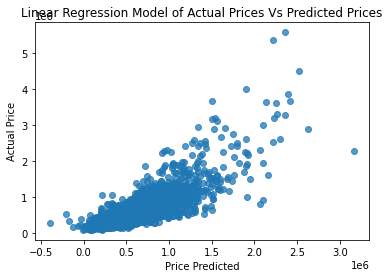

In [135]:
actual_values= y_test
9prediction_values = y_prediction
plt.scatter(y_prediction, actual_values, alpha =.75)
plt.xlabel('Price Predicted')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model of Actual Prices Vs Predicted Prices')
plt.show()

The model is a bit weak as we can see

In [137]:
#Let's create our residuals
residuals = np.subtract(y_prediction, y_test)
#Let's describe our residual
pd.DataFrame(residuals).describe()
residuals.mean()

-1993.4104769341234

My residual mean is honestly way off the mark

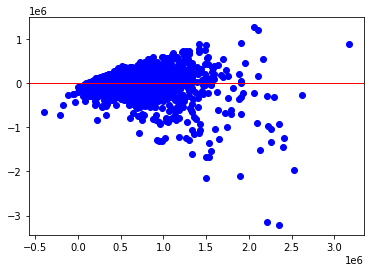

In [138]:
plt.scatter(y_prediction, residuals, color='blue')
plt.axhline(y=residuals.mean(), color='red', linewidth=1)

Our residuals are centred around a mean which is close to 0 although there seems to be some sort of pattern. 

In [141]:
#Let's check for heteroskedasticity using bartlett's test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_prediction,residuals)
#to interpret the results we al compute a critical value of the chi squared distribution
degree_of_freedom = len(y_prediction)-1
probability=1-p_value
critical_value = sp.stats.chi2.ppf(probability,degree_of_freedom)
print(critical_value)
if(test_result > critical_value):
  print('the variances are unequal, the model needs reassessment')
else:
  print('the variances are homogenous')  

inf
the variances are homogenous


This means that the there no patterns to the variance of data and thus we accept the null hypothesis. With such homogenous variances, our model is ok

**Quantile Regression**

In [218]:
#import the necessary libraries
import statsmodels.formula.api as smf
mod = smf.quantreg('y~x', house_data)
res =mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3988
Model:                       QuantReg   Bandwidth:                   2.404e+04
Method:                 Least Squares   Sparsity:                    3.393e+05
Date:                Mon, 29 Nov 2021   No. Observations:                21613
Time:                        02:08:26   Df Residuals:                    21598
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.174e+05   1154.078    448.347      0.000    5.15e+05     5.2e+05
x[0]       -2.381e+04   1468.630    -16.211      0.000   -2.67e+04   -2.09e+04
x[1]        2.444e+04   1783.293     13.705      0.000    2.09e+04    2.79e+04
x[2]        8.495e+04   2780.594     30.550      0.0

In [223]:
#let's do this for other quantiles
quantiles= np.arange(0.1,1,0.1)
models = []
params = []
#we build models for every quantile in out list of quantiles inside a for loop
#as we build these models we store the model parameters in a list called params
for qt in quantiles:
  res = mod.fit(q = qt)
  models.append(res)
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
#lastly, we make a dataframe of the same name, so we can view different models
params = pd.DataFrame(data = params, colums = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

KeyError: ignored

**Ridge Regression**

In [143]:
#import the libraries needed
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [145]:
#determine most appropriate model for l2 regularization
ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [146]:
#using the .fit function to run the model then use .best_params and . best_scores function to determine the strength of the model
search.fit(x,y)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

{'alpha': 0.01}

In [148]:
{'alpha': 0.01}
abs(search.best_score_)

47134299728.33311

The initial mean squared error is 52187073650.80219. Our new mean squared error is a bit lower and hence better. 

In [154]:
from sklearn.preprocessing import StandardScaler

In [156]:
from sklearn.pipeline import make_pipeline


ridge=Ridge(normalize=True, alpha=0.01)
ridge.fit(x_train,y_train)
model2=(mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
model2 = make_pipeline(StandardScaler(with_mean=False), Ridge())
print(model2)


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


**Lasso Regression**

In [158]:
x = house_data.drop('price', axis=1)
y = house_data['price']
#scale the data
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [160]:
#fit the lasso model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lasso = linear_model.Lasso()
lasso.fit(x,y)


Lasso()

In [162]:
#print scores, MSE, and coefficients
print('lasso score:', lasso.score(x,y))
print('lasso MSE:', mean_squared_error(y, lasso.predict(x)))
print('lasso coef:', lasso.coef_)

lasso score: 0.6556269340332698
lasso MSE: 46472719997.55002
lasso coef: [ -35963.08565104   40462.75553972  145750.25931966    -375.03586648
   13403.83854351   50528.85877118   33180.9702457    12713.38691824
  141598.58448623    2805.03265386 -106441.23595952    -888.43051208
   17462.21514624  -14819.1695384 ]


In [167]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
parameters = {'alpha':np.concatenate((np.arange(0.1,2,0.1), np.arange(2,5,0.5), np.arange(5,25,1)))}
linear=linear_model.LinearRegression()
lasso=linear_model.Lasso()
gridlasso = GridSearchCV(lasso,parameters,scoring ='r2')
#fit the models and print the best parameters, R-squared scoresm MSE and coefficients
gridlasso.fit(x_train, y_train)
linear.fit(x_train, y_train)
print('Lasso best parameters:', gridlasso.best_params_)
print('Laaso score:"', gridlasso.score(x_test, y_test))
print('Linear score:', linear.score(x_test,y_test))
print('Lasso MSE:', mean_squared_error(y_test, gridlasso.predict(x_test)))
print('Linear MSE:', mean_squared_error(y_test,linear.predict(x_test)))
print('Lasso best estimator coeff:',gridlasso.best_estimator_.coef_)
print('Linear coef:', linear.coef_)

Lasso best parameters: {'alpha': 24.0}
Laaso score:" 0.6551960641412116
Linear score: 0.6552001851487675
Lasso MSE: 52187697384.67245
Linear MSE: 52187073650.796814
Lasso best estimator coeff: [ -35149.18470829   42725.82699864  144109.16202796   -2058.39629604
   14367.15183957   48480.88682744   33560.27799743   11307.8055061
  139751.62618789    3213.31059114 -107943.41061518    -777.86562407
   17816.34269161  -12334.16662449]
Linear coef: [ -35214.22485063   42748.41371861  144118.54338152   -2081.84452068
   14428.67686711   48497.29284714   33560.10337087   11324.34247488
  139764.59086151    3247.44262953 -108020.74875915    -829.5668516
   17830.85400108  -12349.72459316]


The r score for both models is almost the same and therefore, there is no much difference

In [172]:
coefsLasso =[]
#build lasso for 200 values of alpha and write the coefficients into an array
alphasLasso = np.arange(0,20,0.1)
for i in range(200):
  lasso=linear_model.Lasso(alpha=alphasLasso[i])
  lasso.fit(x_train,y_train)
  coefsLasso.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.896e+14, tolerance: 2.262e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

<function matplotlib.pyplot.show>

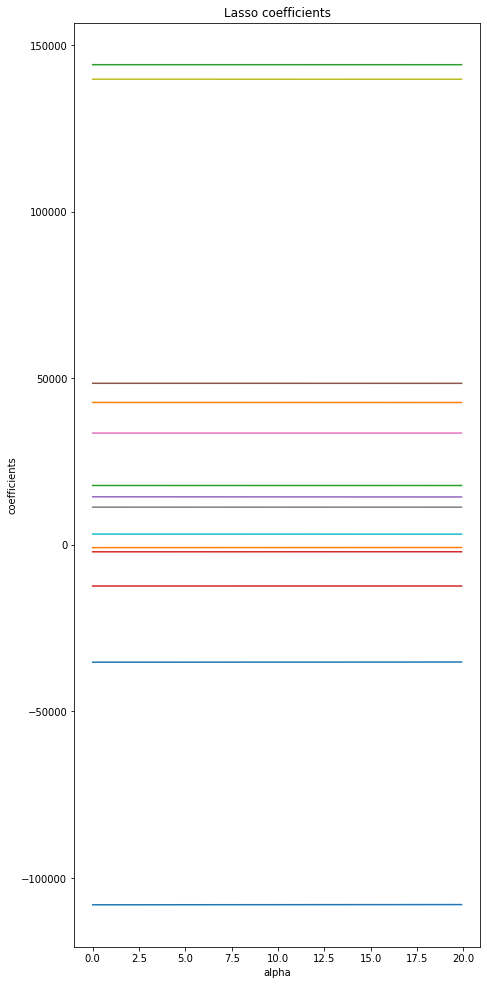

In [174]:
#build the lasso coefficient plots
plt.figure(figsize=(16,17))
plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show

The coefficients are very large, which makes all this very odd. 

**Elastic Net Regression**

In [212]:
x = house_data.drop('price', axis=1)
y = house_data['price']
x = pd.DataFrame(x)
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
#scale the data
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [213]:
#begin with linear regression
#Applying the Model
from sklearn.linear_model import LinearRegression
#create an object with LR class
LR=LinearRegression()
#fit the training data
LR.fit(x_train,y_train)

LinearRegression()

In [214]:
y_pred = LR.predict(x_test)
y_pred

array([ 536159.39639538,  718265.7594572 , 1223521.62042211, ...,
        502393.39130029,  540903.53562598,  518844.02227267])

In [182]:
from sklearn.linear_model import ElasticNet

In [187]:
#choosing optimal parameters
enet=ElasticNet(normalize=True)
param_grid = [{'alpha':[0.00005, 0.0005, 0.001, 0.01, 1, 10, 15,30],
            'l1_ratio' :[0, 0.2, 0.4, 0.6, 0.8, 1.0],
            }
           ]
#creating gridsearch using 10-fold cross validation
clf=GridSearchCV(enet,param_grid= param_grid, cv=10, scoring = 'neg_mean_squared_error', n_jobs=1, refit=True)

#fitting the grid search
best_clf = clf.fit(x_train,y_train)   

#predicting the values based on the new parameters
y_pred = best_clf.predict(x_test)

In [191]:
#checking the accuracy and the best hyperparameters
print('Best Alpha:', best_clf.best_estimator_.get_params()['alpha'])
print('Best L1_ratio:', best_clf.best_estimator_.get_params()['l1_ratio'])
print('Mean squared error:', mean_squared_error(y_test,y_pred))

Best Alpha: 1
Best L1_ratio: 1.0
Mean squared error: 52190752601.16175


In [205]:
#model selection using these parameters
elastic = ElasticNet(normalize=True, alpha=1, l1_ratio=1.0)
#fitting the model
elastic.fit(x_train,y_train)
elastic_model=elastic.score(x_test,y_test)
print(elastic_model)

0.6551758783364492


The elastic net regression score is still not that different from linear regression.

In [215]:
coef_dict_baseline ={}
for coef, feat in zip(elastic.coef_,x_test.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline  

{'bathrooms': 42617.406220799516,
 'bedrooms': -34854.81479470182,
 'condition': 11233.755536339671,
 'floors': 14089.311158659193,
 'grade': 139699.4901299215,
 'sqft_basement': 3063.8302740771815,
 'sqft_living': 144062.54558476742,
 'sqft_living15': 17753.043596963264,
 'sqft_lot': -1974.0829479610475,
 'sqft_lot15': -12249.48593678745,
 'view': 33560.022565806685,
 'waterfront': 48411.22182013419,
 'yr_built': -107593.83536913276,
 'zipcode': -547.2592233181888}

The features look independent as the variance cannot be ecplained

# **Conclusion**

The Multiple LInear Regression provided the best prediction. 

Follow up Questions:


Did we have enough data? we did have enough data


Do we need any other data? The data provided is enough to make a prediction


Did we have the right questions? Perhaps not. Some variables look particularly useless esp the zipcode since it is all relatively in the same area. 